In [ ]:
!pip list -v

NLP project
. Emotion detection In Text
. Text Classifier


In [1]:
# Load EDA pakages
import pandas as pd
import numpy as np

In [3]:
# Load Data Viz pkgs
import seaborn as sns

In [4]:
!pip install eli5 lime dalex neattext pandas spacy numpy seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 7.2 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=c7619d18ed4a937e774b534deee0693a957159a65636bab960832583233ee602
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=61ea62365ed0e2209b840db7d15a2e005dd33d7044128f97fe7725796b494b62
  Stored in directory: /root/.cache/pip/wheels/f

In [7]:
import pickle

## helper function
def load_from_pickle(directory):
    return pickle.load(open(directory,"rb"))

In [22]:
df = load_from_pickle(directory="/content/merged_training.pkl")


In [23]:
#Load Text cleaning pkgs
import neattext.functions as nfx

In [24]:
# Load ML pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
df.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


In [26]:
# Value Counts
df['emotions'].value_counts()


joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

In [27]:
# Value Counts
df['emotions'].value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

<Axes: xlabel='emotions', ylabel='count'>

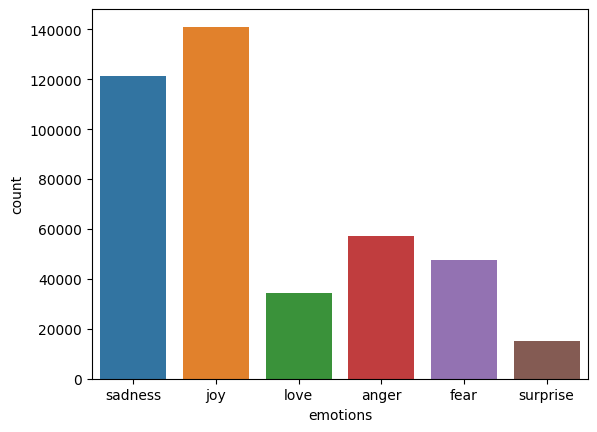

In [29]:
# plot
sns.countplot(x='emotions',data = df)

In [32]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
#Cleaning


In [33]:
# User Handles
df['Clean_Text'] = df['text'].apply(nfx.remove_userhandles)

In [34]:
# Stop words
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [35]:
df

,text,emotions,Clean_Text
27383,i feel awful about it too because it s my job ...,sadness,feel awful job position succeed happen
110083,im alone i feel awful,sadness,im feel awful
140764,ive probably mentioned this before but i reall...,joy,ive probably mentioned feel proud actually kee...
100071,i was feeling a little low few days back,sadness,feeling little low days
2837,i beleive that i am much more sensitive to oth...,love,beleive sensitive peoples feelings tend compas...
...,...,...,...
566,that was what i felt when i was finally accept...,joy,felt finally accepted bulgarian conservatorie ...
36236,i take every day as it comes i m just focussin...,fear,day comes focussing eating better moment aimin...
76229,i just suddenly feel that everything was fake,sadness,suddenly feel fake
131640,im feeling more eager than ever to claw back w...,joy,im feeling eager claw went pear shaped week track


<Axes: xlabel='emotions', ylabel='count'>

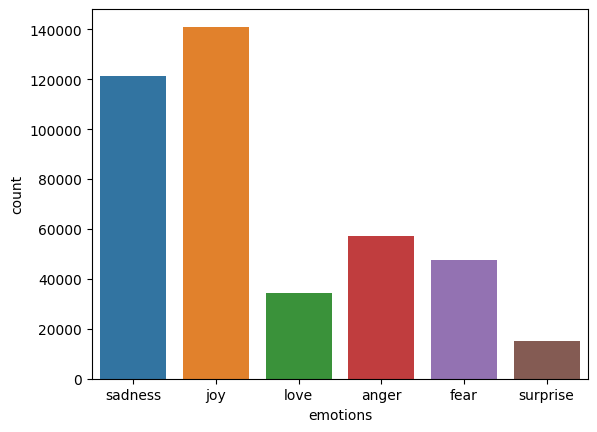

In [49]:
# plot
sns.countplot(x='emotions',data = df)

In [36]:
# Feature & labels
xfeatures = df['Clean_Text']
ylabels = df['emotions']

In [37]:
# Splti Data
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size=0.2,random_state=42)

In [38]:
#Build Pipeline
from sklearn.pipeline import Pipeline

In [39]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [40]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [41]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [42]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.8869988723878985

In [43]:
ex1 = "This book was so interesting it made me happy"

In [44]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [45]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.03062107, 0.01792147, 0.87181957, 0.021991  , 0.05527602,
        0.00237086]])

In [46]:
# To know the classes
pipe_lr.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [47]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_19_june_2023.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')